In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/ultralytics/yolov5
! cd yolov5; pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16094, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16094 (delta 0), reused 4 (delta 0), pack-reused 16089
Receiving objects: 100% (16094/16094), 14.81 MiB | 18.31 MiB/s, done.
Resolving deltas: 100% (11019/11019), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 

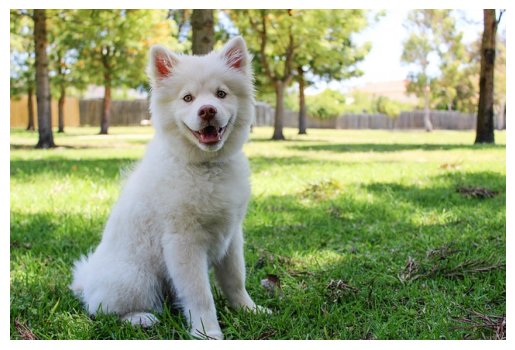

In [ ]:

import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/Shareddrives/Dog/Dog_photo/Dog_face/dog_face_69.jpg'  # 이미지 파일 경로

# 이미지 파일 읽기
image = cv2.imread(image_path)

# OpenCV는 이미지를 BGR 형식으로 읽기 때문에, Matplotlib을 사용하여 RGB로 변환하여 출력
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(image_rgb)
plt.axis('off')  # 이미지 축 제거
plt.show()


In [ ]:
# 이미지 yolov5 개 객체 탐지 후 바운딩박스 모양으로 잘라서 저장
import cv2
import torch
import os

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # YOLOv5s 모델 로드

# 이미지 폴더 경로 설정
input_directory = "/content/drive/MyDrive/Model_for_Share/dog_img/"
output_directory = "/content/drive/MyDrive/Model_for_Share/dog_img_res/"
os.makedirs(output_directory, exist_ok=True)

# 원하는 클래스 ID 리스트 설정 (예: 16)
desired_class_ids = [16]  # 개의 클래스 ID 16

# imgs_done 폴더에 있는 이미지 파일들에 대해 YOLOv5로 객체 검출 수행
for filename in os.listdir(input_directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # 이미지 파일 확인
        image_path = os.path.join(input_directory, filename)

        # 이미지 파일의 이름과 확장자 분리
        image_name, image_extension = os.path.splitext(filename)

        # 이미지 불러오기
        frame = cv2.imread(image_path)

        # YOLOv5 객체 검출 실행
        results = model(frame)

        # 검출 결과에서 원하는 클래스에 대한 정보 추출
        class_info = results.pred[0]
        class_ids = class_info[:, 5].int()
        confidences = class_info[:, 4]

        # 개를 검출하고 해당 객체의 바운딩 박스로 이미지를 잘라서 저장
        dog_detected = False
        dog_highest_confidence = 0
        dog_roi = None

        for i, class_id in enumerate(class_ids):
            confidence = confidences[i]
            box = class_info[i, :4].cpu().numpy().astype(int)
            x1, y1, x2, y2 = box

            # 개 검출
            if class_id in desired_class_ids and confidence > 0.2 and confidence > dog_highest_confidence:
                dog_highest_confidence = confidence
                dog_roi = frame[y1:y2, x1:x2]
                dog_detected = True

        # 개를 저장
        if dog_detected:
            dog_filename = f"{output_directory}/{image_name}{image_extension}"
            cv2.imwrite(dog_filename, dog_roi)
            print(f"Dog detected in {filename} and saved at {output_directory}")
        else:
            print(f"No dog detected in {filename}")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-15 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


No dog detected in dog1.jpg
Dog detected in dog2.jpg and saved at /content/drive/MyDrive/Model_for_Share/dog_img_res/
Dog detected in dog4.jpg and saved at /content/drive/MyDrive/Model_for_Share/dog_img_res/
Dog detected in dog3.jpg and saved at /content/drive/MyDrive/Model_for_Share/dog_img_res/


In [ ]:
import cv2
import torch
import os

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # YOLOv5s 모델 로드

# 이미지 폴더 경로 설정
input_directory = "/content/drive/Shareddrives/Dog/Dog_photo/Dog_master/"
output_directory = "/content/drive/MyDrive/Model_for_Share/output_images_dm"
os.makedirs(output_directory, exist_ok=True)

# 원하는 클래스 ID 리스트 설정 (예: 0, 16)
desired_class_ids = [16]

# imgs_done 폴더에 있는 이미지 파일들에 대해 YOLOv5로 객체 검출 수행
for filename in os.listdir(input_directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # 이미지 파일 확인
        image_path = os.path.join(input_directory, filename)

        # 이미지 파일의 이름과 확장자 분리
        image_name, image_extension = os.path.splitext(filename)

        # 이미지 불러오기
        frame = cv2.imread(image_path)

        # YOLOv5 객체 검출 실행
        results = model(frame)

        # 검출 결과에서 원하는 클래스에 대한 정보 추출
        class_info = results.pred[0]
        class_ids = class_info[:, 5].int()
        confidences = class_info[:, 4]

        # 사람과 개를 검출하고 해당 객체의 바운딩 박스로 잘라서 이미지로 저장
        person_detected = False
        dog_detected = False

        # 사람과 개를 저장하기 위한 변수
        dog_highest_confidence = 0
        dog_roi = None

        for i, class_id in enumerate(class_ids):
            confidence = confidences[i]
            box = class_info[i, :4].cpu().numpy().astype(int)
            x1, y1, x2, y2 = box

            # 개 검출
            if class_id == 16 and confidence > 0.2 and confidence > dog_highest_confidence:
                dog_highest_confidence = confidence
                dog_roi = frame[y1:y2, x1:x2]
                dog_detected = True

        # 개를 저장
        if dog_detected:
            dog_filename = f"{output_directory}/{image_name}{image_extension}"
            cv2.imwrite(dog_filename, dog_roi)
            print(f"Dog detected in {filename} and saved at {output_directory}")
        else:
            print(f"No dog detected in {filename}")



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-15 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


No dog detected in Dog_master_308_2.jpg
Dog detected in Dog_master_308_1.jpg and saved at /content/drive/MyDrive/Model_for_Share/output_images_dm
No dog detected in Dog_master_66_1.jpg
No dog detected in Dog_master_309_1.jpg
No dog detected in Dog_master_66_4.jpg
No dog detected in Dog_master_308_3.jpg
No dog detected in Dog_master_45_2.jpg
No dog detected in Dog_master_288_3.jpg
No dog detected in Dog_master_45_4.jpg
Dog detected in Dog_master_67_4.jpg and saved at /content/drive/MyDrive/Model_for_Share/output_images_dm
No dog detected in Dog_master_312_1.jpg
Dog detected in Dog_master_311_2.jpg and saved at /content/drive/MyDrive/Model_for_Share/output_images_dm
No dog detected in Dog_master_289_2.jpg
No dog detected in Dog_master_308_4.jpg
No dog detected in Dog_master_48_1.jpg
No dog detected in Dog_master_46_3.jpg
No dog detected in Dog_master_46_4.jpg
No dog detected in Dog_master_66_3.jpg
Dog detected in Dog_master_47_2.jpg and saved at /content/drive/MyDrive/Model_for_Share/out

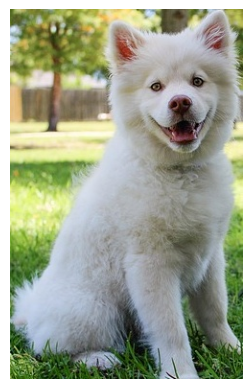

In [ ]:

import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Model_for_Share/output_images/dog_face_69.jpg'  # 이미지 파일 경로

# 이미지 파일 읽기
image = cv2.imread(image_path)

# OpenCV는 이미지를 BGR 형식으로 읽기 때문에, Matplotlib을 사용하여 RGB로 변환하여 출력
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(image_rgb)
plt.axis('off')  # 이미지 축 제거
plt.show()


1/1 [==============================] - 0s 102ms/step
Predicted class: not_highlight


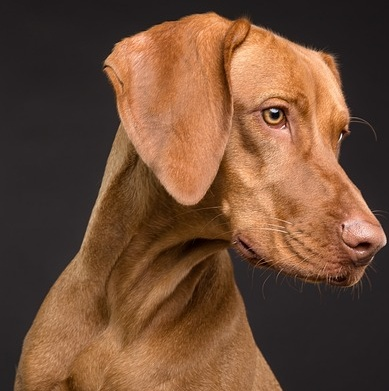

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# 학습한 모델의 경로 설정
saved_model_path = '/content/drive/MyDrive/Model_for_Share/my_trained_model_2.h5'

# 모델 불러오기
model = load_model(saved_model_path)

# 이미지 파일 경로 설정
file_path = '/content/drive/MyDrive/Model_for_Share/dog_img_res/dog2.jpg'

# 이미지 로드 및 사이즈 조정
img = cv2.imread(file_path)
img = cv2.resize(img, (150, 150))  # 모델에 맞는 크기로 조정 (예시)

# 이미지 전처리
img = img.astype('float32') / 255  # 이미지를 0-1 사이 값으로 정규화
img = np.expand_dims(img, axis=0)  # 배치 차원 추가

# 모델에 이미지 입력하여 예측
predictions = model.predict(img)

# 예측 결과 해석
class_names = ['face', 'lying', 'not_highlight']  # 클래스 이름을 지정하세요
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {class_names[predicted_class[0]]}')  # 예측된 클래스를 출력합니다.

# 이미지 표시
cv2_imshow(cv2.imread(file_path))


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import torch
import os

# YOLO 모델 로드
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # YOLOv5s 모델 로드

# 비디오 파일 열기
video_path = "/content/drive/MyDrive/Model_for_Share/dog7.mp4"
cap = cv2.VideoCapture(video_path)  # 비디오 파일 경로 설정

# 모델 불러오기
model = load_model(saved_model_path)

# output_images 디렉토리 생성
output_directory = "/content/drive/MyDrive/Model_for_Share/output_images_3"
os.makedirs(output_directory, exist_ok=True)

# 프레임 처리 루프
frame_number = 0
sampling_interval = 30  # 매 60프레임마다 샘플링 (예: 2초마다) FPS 30으로 가정

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 프레임 번호가 샘플링 간격의 배수일 때만 처리
    if frame_number % sampling_interval == 0:
        # YOLOv5 객체 검출 실행
        results = model_yolo(frame)

        # ro 클래스에 해당하는 객체 정보 추출
        dog_class_info = results.pred[0][results.pred[0][:, -1].int() == 16]

        # 'dog' 클래스 객체가 있는 경우 이미지 저장
        if len(dog_class_info) > 0:
            # 상자 박스와 클래스 확률 표시
            for dog_info in dog_class_info:
                box = dog_info[:4].cpu().numpy().astype(int)
                x1, y1, x2, y2 = box

            # 이미지 저장
            image_filename = f"{output_directory}/frame_{frame_number}.jpg"
            cv2.imwrite(image_filename, frame)

    frame_number += 1

# 비디오 캡처 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2
import torch
import os

# YOLO 모델 로드
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # YOLOv5s 모델 로드

# 비디오 파일 열기
video_path = "/content/drive/MyDrive/Model_for_Share/dog6.mp4"
cap = cv2.VideoCapture(video_path)  # 비디오 파일 경로 설정

# 학습한 모델의 경로 설정
saved_model_path = '/content/drive/MyDrive/Model_for_Share/my_trained_model_2.h5'

# 모델 불러오기
model = load_model(saved_model_path)

# output_images 디렉토리 생성
output_directory = "/content/drive/MyDrive/Model_for_Share/output_images_v2"
os.makedirs(output_directory, exist_ok=True)

# 프레임 처리 루프
frame_number = 0
sampling_interval = 30  # 매 60프레임마다 샘플링 (예: 2초마다) FPS 30으로 가정

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 프레임 번호가 샘플링 간격의 배수일 때만 처리
    if frame_number % sampling_interval == 0:
        # YOLOv5 객체 검출 실행
        results = model_yolo(frame)

        # ro 클래스에 해당하는 객체 정보 추출
        dog_class_info = results.pred[0][results.pred[0][:, -1].int() == 16]

        # 'dog' 클래스 객체가 있는 경우 이미지 저장
        if len(dog_class_info) > 0:
            # 상자 박스와 클래스 확률 표시
            for dog_info in dog_class_info:
                highlight = 0
                box = dog_info[:4].cpu().numpy().astype(int)
                x1, y1, x2, y2 = box

                label = f"Dog, Confidence: {dog_info[4]:.2f}"

                dog_image = frame[y1:y2, x1:x2]

                # 이미지 사이즈 조정
                dog_image_resized = cv2.resize(dog_image, (150, 150))  # 모델에 맞는 크기로 조정
                dog_image_resized = np.expand_dims(dog_image_resized, axis=0)  # 배치 차원 추가

                # 모델에 이미지 입력하여 예측
                predictions = model.predict(dog_image_resized)

                # 예측 결과 해석
                class_names = ['face', 'lying', 'not_highlight']  # 클래스 이름을 지정하세요
                predicted_class = np.argmax(predictions, axis=1)
                if class_names[predicted_class[0]] != 'not_highlight':
                  highlight = 1
                print(f'Predicted class: {class_names[predicted_class[0]]}')  # 예측된 클래스를 출력합니다

            # 이미지 저장
            if highlight == 1:
              image_filename = f"{output_directory}/frame_{frame_number}.jpg"
              cv2.imwrite(image_filename, frame)

    frame_number += 1

# 비디오 캡처 해제 및 창 닫기
cap.release()
cv2.destroyAllWindows()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-22 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


1/1 [==============================] - 0s 78ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 23ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 21ms/step
Predicted class: face
1/1 [==============================] - 0s 22ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 21ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 22ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 22ms/step
Predicted class: not_highlight
1/1 [==============================] - 0s 20ms/step
Predicted class: not_highlight
